# Technical Case Meivcore Group

Iremos considerar, para realização do exercício,  apenas as 500 mil primeiras linhas do arquivo csv.

O arquivo original possui mais de 56 milhões de registros e 55 colunas, o que torna o código lento e por vezes impossibilitava a excecução.

Para carregar o código com o arquivo completo basta substituir o comando `#load csv file into pandas dataframe`pelo que segue abaixo:

```python
  df= pd.read_csv(f"{ROOT_PATH}/{DATA_FILE}", low_memory=False)
```


## 1. Extract

Para extrair as informações de um arquivo csv para um dataframe, substitua na linha de comando abaixo a o valor da variável `ROOT_PATH` pelo caminho onde o arquivo está armazenado e `DATA_FILE` pelo nome do arquivo csv.

In [61]:
ROOT_PATH = 'C:/Users/vanes/OneDrive/Documentos/case_meivcore/data'
DATA_FILE = 'BasicCompanyDataAsOneFile-2024-07-01.csv'

In [62]:
# import libraries

# Data manipulation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [63]:

#load csv file into pandas dataframe
df= pd.read_csv(f"{ROOT_PATH}/{DATA_FILE}", nrows=500000, low_memory=False)



KeyboardInterrupt: 

## 2. Transformation: About Dataset

In [ ]:
# show the first 5 rows
df.head(5)

,CompanyName,CompanyNumber,RegAddress.CareOf,RegAddress.POBox,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.County,RegAddress.Country,RegAddress.PostCode,...,PreviousName_7.CONDATE,PreviousName_7.CompanyName,PreviousName_8.CONDATE,PreviousName_8.CompanyName,PreviousName_9.CONDATE,PreviousName_9.CompanyName,PreviousName_10.CONDATE,PreviousName_10.CompanyName,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,! LTD,08209948,NaN,NaN,9 PRINCES SQUARE,NaN,HARROGATE,NaN,ENGLAND,HG1 1ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25/09/2024,11/09/2023
1,!? LTD,11399177,NaN,NaN,THE STUDIO HATHERLOW HOUSE,HATHERLOW,ROMILEY,NaN,UNITED KINGDOM,SK6 3DY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19/06/2024,05/06/2023
2,!BIG IMPACT GRAPHICS LIMITED,11743365,NaN,NaN,372 OLD STREET,335 ROSDEN HOUSE,LONDON,NaN,UNITED KINGDOM,EC1V 9LT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29/12/2024,15/12/2023
3,!GOBERUB LTD,13404790,NaN,NaN,13 SOUTHMILL ROAD,NaN,BISHOP'S STORTFORD,HERTFORDSHIRE,ENGLAND,CM23 3FR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29/05/2024,15/05/2023
4,!NFLECTION ADVISORY LIMITED,15073164,NaN,NaN,52 MEADWAY,NaN,BARNET,NaN,UNITED KINGDOM,EN5 5LB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28/08/2024,NaN


In [ ]:
# check df's size
df.shape

(500000, 55)

NO dataset em questão, temos 5621440 linhas e 55 colunas. Vamos verificar as informações gerais acerca da estrutura dele.

In [ ]:
# check df columns types
df.dtypes

CompanyName                            object
 CompanyNumber                         object
RegAddress.CareOf                      object
RegAddress.POBox                       object
RegAddress.AddressLine1                object
 RegAddress.AddressLine2               object
RegAddress.PostTown                    object
RegAddress.County                      object
RegAddress.Country                     object
RegAddress.PostCode                    object
CompanyCategory                        object
CompanyStatus                          object
CountryOfOrigin                        object
DissolutionDate                       float64
IncorporationDate                      object
Accounts.AccountRefDay                float64
Accounts.AccountRefMonth              float64
Accounts.NextDueDate                   object
Accounts.LastMadeUpDate                object
Accounts.AccountCategory               object
Returns.NextDueDate                    object
Returns.LastMadeUpDate            

Aqui temos algumas conversões a fazer. Por exemplo, as colunas que envolverem datas, vamos converte-las para datetime. Entretanto, antes de todo este tratamento, vamos verificar primeiro a quantidade de nulos no dataframe para reduzir números de colunas em casos de colunas com mais nulos do que informações que possam ser utilizadas.

In [ ]:
# checking missing values

df.isnull().sum()

CompanyName                                0
 CompanyNumber                             0
RegAddress.CareOf                     496248
RegAddress.POBox                      496516
RegAddress.AddressLine1                 3122
 RegAddress.AddressLine2              206518
RegAddress.PostTown                     8191
RegAddress.County                     352908
RegAddress.Country                    101481
RegAddress.PostCode                     5819
CompanyCategory                            0
CompanyStatus                              0
CountryOfOrigin                            0
DissolutionDate                       500000
IncorporationDate                          0
Accounts.AccountRefDay                 12808
Accounts.AccountRefMonth               12808
Accounts.NextDueDate                   14163
Accounts.LastMadeUpDate               134030
Accounts.AccountCategory                   0
Returns.NextDueDate                    14534
Returns.LastMadeUpDate                335822
Mortgages.

Vemos um grande valor de nulos. Vamos verificar estes valores em porcentagens.

In [ ]:
# calculate missing values percentage

(df.isnull().sum()/len(df))*100


CompanyName                             0.0000
 CompanyNumber                          0.0000
RegAddress.CareOf                      99.2496
RegAddress.POBox                       99.3032
RegAddress.AddressLine1                 0.6244
 RegAddress.AddressLine2               41.3036
RegAddress.PostTown                     1.6382
RegAddress.County                      70.5816
RegAddress.Country                     20.2962
RegAddress.PostCode                     1.1638
CompanyCategory                         0.0000
CompanyStatus                           0.0000
CountryOfOrigin                         0.0000
DissolutionDate                       100.0000
IncorporationDate                       0.0000
Accounts.AccountRefDay                  2.5616
Accounts.AccountRefMonth                2.5616
Accounts.NextDueDate                    2.8326
Accounts.LastMadeUpDate                26.8060
Accounts.AccountCategory                0.0000
Returns.NextDueDate                     2.9068
Returns.LastM

Podemos observar que temos muitas colunas que possuem mais de 80% dos registros nulos. Sendo assim, estas colunas não nos vão trazer dados que vão agregar muito valor às análises. Portanto, vamos optar por excluir das análises as colunas com porcentagem de nulos **superior à 50%**.

In [ ]:

# Calculate the percentage of null values ​​for each column
null_percent = df.isnull().mean() * 100

# Identify columns to remove
cols_to_remove = null_percent[null_percent > 50].index

# Remove columns from the DataFrame
df.drop(columns=cols_to_remove, inplace=True)

# Check the remaining columns and the amount of null values
print((df.isnull().sum()/len(df))*100)


CompanyName                            0.0000
 CompanyNumber                         0.0000
RegAddress.AddressLine1                0.6244
 RegAddress.AddressLine2              41.3036
RegAddress.PostTown                    1.6382
RegAddress.Country                    20.2962
RegAddress.PostCode                    1.1638
CompanyCategory                        0.0000
CompanyStatus                          0.0000
CountryOfOrigin                        0.0000
IncorporationDate                      0.0000
Accounts.AccountRefDay                 2.5616
Accounts.AccountRefMonth               2.5616
Accounts.NextDueDate                   2.8326
Accounts.LastMadeUpDate               26.8060
Accounts.AccountCategory               0.0000
Returns.NextDueDate                    2.9068
Mortgages.NumMortCharges               0.0000
Mortgages.NumMortOutstanding           0.0000
Mortgages.NumMortPartSatisfied         0.0000
Mortgages.NumMortSatisfied             0.0000
SICCode.SicText_1                 

Outra correção a ser feita, é a remoção de espaços em branco no nome das colunas. Isto pode atrapalhar as análises posteriores.

In [ ]:
# remove spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
df.head(10)

,CompanyName,CompanyNumber,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,...,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
0,! LTD,08209948,9 PRINCES SQUARE,NaN,HARROGATE,ENGLAND,HG1 1ND,Private Limited Company,Active,United Kingdom,...,0,0,0,0,99999 - Dormant Company,0,0,http://business.data.gov.uk/id/company/08209948,25/09/2024,11/09/2023
1,!? LTD,11399177,THE STUDIO HATHERLOW HOUSE,HATHERLOW,ROMILEY,UNITED KINGDOM,SK6 3DY,Private Limited Company,Active,United Kingdom,...,0,0,0,0,47710 - Retail sale of clothing in specialised...,0,0,http://business.data.gov.uk/id/company/11399177,19/06/2024,05/06/2023
2,!BIG IMPACT GRAPHICS LIMITED,11743365,372 OLD STREET,335 ROSDEN HOUSE,LONDON,UNITED KINGDOM,EC1V 9LT,Private Limited Company,Active,United Kingdom,...,0,0,0,0,18129 - Printing n.e.c.,0,0,http://business.data.gov.uk/id/company/11743365,29/12/2024,15/12/2023
3,!GOBERUB LTD,13404790,13 SOUTHMILL ROAD,NaN,BISHOP'S STORTFORD,ENGLAND,CM23 3FR,Private Limited Company,Active,United Kingdom,...,0,0,0,0,62020 - Information technology consultancy act...,0,0,http://business.data.gov.uk/id/company/13404790,29/05/2024,15/05/2023
4,!NFLECTION ADVISORY LIMITED,15073164,52 MEADWAY,NaN,BARNET,UNITED KINGDOM,EN5 5LB,Private Limited Company,Active,United Kingdom,...,0,0,0,0,70229 - Management consultancy activities othe...,0,0,http://business.data.gov.uk/id/company/15073164,28/08/2024,NaN
5,!NFOGENIE LTD,13522064,71-75 SHELTON STREET,NaN,LONDON,UNITED KINGDOM,WC2H 9JQ,Private Limited Company,Active,United Kingdom,...,0,0,0,0,58290 - Other software publishing,0,0,http://business.data.gov.uk/id/company/13522064,03/08/2024,20/07/2023
6,!NK MEDIA LIMITED,15801429,"85 GREAT PORTLAND STREET, FIRST FLOOR, LONDON ...",FIRST FLOOR,LONDON,ENGLAND,W1W 7LT,Private Limited Company,Active,United Kingdom,...,0,0,0,0,59112 - Video production activities,0,0,http://business.data.gov.uk/id/company/15801429,08/07/2025,NaN
7,!NNOV8 LIMITED,11006939,OLD BARN FARM,HARTFIELD ROAD,EDENBRIDGE,ENGLAND,TN8 5NF,Private Limited Company,Active,United Kingdom,...,0,0,0,0,62090 - Other information technology service a...,0,0,http://business.data.gov.uk/id/company/11006939,24/10/2024,10/10/2023
8,!NNOVATION LAB LTD,15431491,6 THORNEYHOLME CLOSE,LOSTOCK,BOLTON,ENGLAND,BL6 4BZ,Private Limited Company,Active,United Kingdom,...,0,0,0,0,70229 - Management consultancy activities othe...,0,0,http://business.data.gov.uk/id/company/15431491,04/02/2025,NaN
9,!NSPIRED INVESTMENTS LTD,SC606050,26 POLMUIR ROAD,NaN,ABERDEEN,SCOTLAND,AB11 7SY,Private Limited Company,Active,United Kingdom,...,5,5,0,0,68209 - Other letting and operating of own or ...,0,0,http://business.data.gov.uk/id/company/SC606050,12/02/2025,29/01/2024


In [ ]:
df.dtypes

CompanyName                            object
CompanyNumber                          object
RegAddress.AddressLine1                object
RegAddress.AddressLine2                object
RegAddress.PostTown                    object
RegAddress.Country                     object
RegAddress.PostCode                    object
CompanyCategory                        object
CompanyStatus                          object
CountryOfOrigin                        object
IncorporationDate                      object
Accounts.AccountRefDay                float64
Accounts.AccountRefMonth              float64
Accounts.NextDueDate                   object
Accounts.LastMadeUpDate                object
Accounts.AccountCategory               object
Returns.NextDueDate                    object
Mortgages.NumMortCharges                int64
Mortgages.NumMortOutstanding            int64
Mortgages.NumMortPartSatisfied          int64
Mortgages.NumMortSatisfied              int64
SICCode.SicText_1                 

In [ ]:
df.shape

(500000, 27)

Com as colunas renomeadas, abaixo encontramos o dicionário com o significado das informações contidas em cada uma das 29 colunas remanescentes.

### 2.1. Dicionário de Colunas

- `CompanyName`: Nome da empresa.
- `CompanyNumber`: Número de identificação da empresa.
- `RegAddress.AddressLine1`: Linha 1 do endereço registrado da empresa.
- `RegAddress.AddressLine2`: Linha 2 do endereço registrado da empresa.
- `RegAddress.PostTown`: Cidade do endereço registrado da empresa.
- `RegAddress.Country`: País do endereço registrado da empresa.
- `RegAddress.PostCode`: Código postal do endereço registrado da empresa.
- `CompanyCategory`: Categoria da empresa.
- `CompanyStatus`: Status atual da empresa.
- `CountryOfOrigin`: País de origem da empresa.
- `IncorporationDate`: Data de incorporação da empresa.
- `Accounts.AccountRefDay`: Dia de referência para contas da empresa.
- `Accounts.AccountRefMonth`: Mês de referência para contas da empresa.
- `Accounts.NextDueDate`: Data de vencimento da próxima conta da empresa.
- `Accounts.LastMadeUpDate`: Data da última conta fechada da empresa.
- `Accounts.AccountCategory`: Categoria de contas da empresa.
- `Returns.NextDueDate`: Data de vencimento do próximo retorno da empresa.
- `Mortgages.NumMortCharges`: Número de encargos hipotecários.
- `Mortgages.NumMortOutstanding`: Número de hipotecas pendentes.
- `Mortgages.NumMortPartSatisfied`: Número de hipotecas parcialmente satisfeitas.
- `Mortgages.NumMortSatisfied`: Número de hipotecas totalmente satisfeitas.
- `SICCode.SicText_1`: Descrição do código SIC (Standard Industrial Classification).
- `LimitedPartnerships.NumGenPartners`: Número de sócios gerais em parcerias limitadas.
- `LimitedPartnerships.NumLimPartners`: Número de sócios limitados em parcerias limitadas.
- `URI`: Identificador único de recursos.
- `ConfStmtNextDueDate`: Data de vencimento da próxima declaração de conformidade.
- `ConfStmtLastMadeUpDate`: Data da última declaração de conformidade fechada.



Após observar o nome das empresa e pesquisando por alguns nomes das mesmas online, é possível concluir que o nome das empresas possuem uma "!" no nome, quando na verdade este caracter não existe no nome original, então vamos retirá-lo do nome das empresas.

In [ ]:
df['CompanyName'] = df['CompanyName'].str.replace('!', '')


In [ ]:
# identify duplicates
df.duplicated().sum()

np.int64(0)

Não temos dados duplicados no dataset. Mas vemos pela quantidade de valores não nulos para CompanyName e dados no total do dataset, que algumas empresas têm o mesmo nome, vamos verificar mais afundo.

In [ ]:
# count how many times the same companyname appears in dataset
df['CompanyName'].value_counts()

CompanyName
3 MERCHANT SQUARE LIMITED                                                3
ALLIANCE PROPERTY LIMITED                                                3
ASHFIELD LIMITED                                                         3
ASSOCIATED SUB-CONTRACTORS IN LIMITED PARTNERSHIP WITH LEE SMITH         3
ASSOCIATED SUB-CONTRACTORS IN LIMITED PARTNERSHIP WITH MICHAEL MURPHY    3
                                                                        ..
AUTHOR'S PEN LTD                                                         1
AUTHORCRAFT LTD                                                          1
AUTHORED GROUP LTD                                                       1
AUTHORED LIMITED                                                         1
"786" MAZ OFFICE SUPPORT LIMITED                                         1
Name: count, Length: 499672, dtype: int64

In [ ]:
# identifying repeated company names
df[df['CompanyName'].duplicated(keep=False)]

,CompanyName,CompanyNumber,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,...,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
1,? LTD,11399177,THE STUDIO HATHERLOW HOUSE,HATHERLOW,ROMILEY,UNITED KINGDOM,SK6 3DY,Private Limited Company,Active,United Kingdom,...,0,0,0,0,47710 - Retail sale of clothing in specialised...,0,0,http://business.data.gov.uk/id/company/11399177,19/06/2024,05/06/2023
11629,127 CHARING CROSS ROAD LIMITED,OE016031,RODUS BUILDING PO BOX 3093,TORTOLA,ROADTOWN,"VIRGIN ISLANDS, BRITISH",NaN,Overseas Entity,Active,"VIRGIN ISLANDS, BRITISH",...,0,0,0,0,None Supplied,0,0,http://business.data.gov.uk/id/company/OE016031,05/02/2025,22/01/2024
11630,127 CHARING CROSS ROAD LIMITED,FC039084,RODUS BUILDING,PO BOX 3093,ROAD TOWN,"VIRGIN ISLANDS, BRITISH",NaN,Other company type,Active,,...,0,0,0,0,None Supplied,0,0,http://business.data.gov.uk/id/company/FC039084,NaN,NaN
25996,2 QUAY HOLDINGS LTD,FC041367,VISTRA CORPORATE SERVICE SERVICE CENTRE,ALBERT LAKE DRIVE,THE VALLEY,ANGUILLA,NaN,Other company type,Active,ANGUILLA,...,0,0,0,0,None Supplied,0,0,http://business.data.gov.uk/id/company/FC041367,NaN,NaN
25997,2 QUAY HOLDINGS LTD,OE018962,VISTRA (ANGUILLA) LIMITED,ALBERT LAKE DRIVE,THE VALLEY,ANGUILLA,IM1 1AG,Overseas Entity,Active,ANGUILLA,...,0,0,0,0,None Supplied,0,0,http://business.data.gov.uk/id/company/OE018962,09/02/2025,26/01/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496330,AURELIA LIMITED,03809230,"THE MAIN OFFICE, BACTON BUSINESS PARK RECTORY ...",BACTON,STOWMARKET,ENGLAND,IP14 4LE,Private Limited Company,Active,United Kingdom,...,0,0,0,0,85320 - Technical and vocational secondary edu...,0,0,http://business.data.gov.uk/id/company/03809230,08/08/2024,25/07/2023
496772,AURIENS CHELSEA PROPERTY HOLDING COMPANY LIMITED,OE023805,2ND FLOOR WINDSOR HOUSE,LOWER POLLET,ST. PETER PORT,GUERNSEY,GY1 1WF,Overseas Entity,Active,GUERNSEY,...,0,0,0,0,None Supplied,0,0,http://business.data.gov.uk/id/company/OE023805,08/02/2025,25/01/2024
496773,AURIENS CHELSEA PROPERTY HOLDING COMPANY LIMITED,FC035356,2ND FLOOR WINDSOR HOUSE,LOWER POLLET,ST. PETER PORT,GUERNSEY,GY1 1WF,Other company type,Active,GUERNSEY,...,0,0,0,0,None Supplied,0,0,http://business.data.gov.uk/id/company/FC035356,NaN,NaN
499292,AUSTRALIA AND NEW ZEALAND BANKING GROUP LIMITED,OE026590,ANZ CENTRE MELBOURNE LEVEL 9,833 COLLINS STREET,DOCKLANDS,AUSTRALIA,3008,Overseas Entity,Active,AUSTRALIA,...,0,0,0,0,None Supplied,0,0,http://business.data.gov.uk/id/company/OE026590,01/03/2025,15/02/2024


In [ ]:
# filter df to find '? LTD' company name
df[df['CompanyName'] =='? LTD']

,CompanyName,CompanyNumber,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,...,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,ConfStmtNextDueDate,ConfStmtLastMadeUpDate
1,? LTD,11399177,THE STUDIO HATHERLOW HOUSE,HATHERLOW,ROMILEY,UNITED KINGDOM,SK6 3DY,Private Limited Company,Active,United Kingdom,...,0,0,0,0,47710 - Retail sale of clothing in specialised...,0,0,http://business.data.gov.uk/id/company/11399177,19/06/2024,05/06/2023
83695,? LTD,15149983,128 ABBEYFIELDS CLOSE,NaN,LONDON,ENGLAND,NW10 7EG,Private Limited Company,Active,United Kingdom,...,0,0,0,0,99999 - Dormant Company,0,0,http://business.data.gov.uk/id/company/15149983,03/10/2024,NaN


Para nível de análise, vamos considerar que nomes de empresas podem aparecer com números de registros diferentes devido a diferentes entidades legais ou filiais em diversas jurisdições, alterações estruturais como fusões e aquisições, nomes comerciais variados para diferentes linhas de negócios, além da existência de empresas distintas com o mesmo nome em diferentes setores ou localidades.

Portanto vamos assumir, que estas empresas, apesar do nome igual, por terem numéros de registros diferentes, serão consideradas empresas diferentes.

### Criação de novas colunas

Vemos no dataset que temos uma coluna com CompanyCategory, que se refere a categoria que a empresa está enquadrada. Vamos aqui, verificar os diferentes tipos de registros para tentar classificar melhor a categoria das empresas.

In [ ]:
df['CompanyCategory'].value_counts()

CompanyCategory
Private Limited Company                                                                      459061
PRI/LTD BY GUAR/NSC (Private, limited by guarantee, no share capital)                         17423
Limited Partnership                                                                            6827
Limited Liability Partnership                                                                  4380
Overseas Entity                                                                                2665
PRI/LBG/NSC (Private, Limited by guarantee, no share capital, use of 'Limited' exemption)      2391
Community Interest Company                                                                     2126
Charitable Incorporated Organisation                                                           1963
Other company type                                                                             1308
Registered Society                                                                  

In [ ]:
df.columns

Index(['CompanyName', 'CompanyNumber', 'RegAddress.AddressLine1',
       'RegAddress.AddressLine2', 'RegAddress.PostTown', 'RegAddress.Country',
       'RegAddress.PostCode', 'CompanyCategory', 'CompanyStatus',
       'CountryOfOrigin', 'IncorporationDate', 'Accounts.AccountRefDay',
       'Accounts.AccountRefMonth', 'Accounts.NextDueDate',
       'Accounts.LastMadeUpDate', 'Accounts.AccountCategory',
       'Returns.NextDueDate', 'Mortgages.NumMortCharges',
       'Mortgages.NumMortOutstanding', 'Mortgages.NumMortPartSatisfied',
       'Mortgages.NumMortSatisfied', 'SICCode.SicText_1',
       'LimitedPartnerships.NumGenPartners',
       'LimitedPartnerships.NumLimPartners', 'URI', 'ConfStmtNextDueDate',
       'ConfStmtLastMadeUpDate'],
      dtype='object')

In [ ]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df['SICCode.SicText_1'].value_counts()

SICCode.SicText_1
98000 - Residents property management                                                                                                                                     29150
68209 - Other letting and operating of own or leased real estate                                                                                                          23292
68100 - Buying and selling of own real estate                                                                                                                             19806
None Supplied                                                                                                                                                             19274
70229 - Management consultancy activities other than financial management                                                                                                 19244
82990 - Other business support service activities n.e.c.                                              

In [ ]:
# Defining categories and their corresponding keywords
categories = {
    'Real Estate and Construction': ['real estate', 'construction', 'building', 'housing'],
    'Retail': ['retail sale', 'wholesale', 'trade', 'sale of'],
    'Professional Services and Consulting': ['consultancy', 'management', 'professional', 'legal', 'accounting', 'auditing'],
    'Technology and Information': ['information technology', 'software', 'IT', 'web portals', 'data processing'],
    'Health and Wellness': ['health', 'medical', 'beauty', 'hairdressing', 'fitness'],
    'Education and Culture': ['education', 'training', 'arts', 'culture', 'publishing', 'entertainment'],
    'Manufacturing and Industry': ['manufacture', 'production', 'fabrication', 'builders', 'printing'],
    'Food and Hospitality': ['restaurant', 'food', 'catering', 'hotel', 'bar'],
    'Transportation and Logistics': ['transport', 'logistics', 'delivery', 'warehousing'],
    'Financial and Insurance Activities': ['financial', 'insurance', 'investment', 'banking'],
    'Sports and Recreation': ['sports', 'recreation', 'fitness', 'amusement'],
    'Other Activities and Services': ['other', 'activities', 'not elsewhere classified', 'none supplied']
}

# Function to categorize activities
def categorize_activity(description):
    description_lower = description.lower()
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in description_lower:
                return category
    return 'Other Activities and Services'  # Default category if no match found

# Applying the function to create a new column with categories
df['Category_new'] = df['SICCode.SicText_1'].apply(categorize_activity)



In [ ]:
df.head(10)

,CompanyName,CompanyNumber,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,IncorporationDate,Accounts.AccountRefDay,Accounts.AccountRefMonth,Accounts.NextDueDate,Accounts.LastMadeUpDate,Accounts.AccountCategory,Returns.NextDueDate,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,ConfStmtNextDueDate,ConfStmtLastMadeUpDate,Category_new
0,LTD,08209948,9 PRINCES SQUARE,NaN,HARROGATE,ENGLAND,HG1 1ND,Private Limited Company,Active,United Kingdom,11/09/2012,30.0,9.0,30/06/2025,30/09/2023,DORMANT,09/10/2016,0,0,0,0,99999 - Dormant Company,0,0,http://business.data.gov.uk/id/company/08209948,25/09/2024,11/09/2023,Other Activities and Services
1,? LTD,11399177,THE STUDIO HATHERLOW HOUSE,HATHERLOW,ROMILEY,UNITED KINGDOM,SK6 3DY,Private Limited Company,Active,United Kingdom,05/06/2018,30.0,6.0,31/03/2025,30/06/2023,TOTAL EXEMPTION FULL,03/07/2019,0,0,0,0,47710 - Retail sale of clothing in specialised...,0,0,http://business.data.gov.uk/id/company/11399177,19/06/2024,05/06/2023,Retail
2,BIG IMPACT GRAPHICS LIMITED,11743365,372 OLD STREET,335 ROSDEN HOUSE,LONDON,UNITED KINGDOM,EC1V 9LT,Private Limited Company,Active,United Kingdom,28/12/2018,31.0,12.0,30/09/2024,31/12/2022,DORMANT,25/01/2020,0,0,0,0,18129 - Printing n.e.c.,0,0,http://business.data.gov.uk/id/company/11743365,29/12/2024,15/12/2023,Manufacturing and Industry
3,GOBERUB LTD,13404790,13 SOUTHMILL ROAD,NaN,BISHOP'S STORTFORD,ENGLAND,CM23 3FR,Private Limited Company,Active,United Kingdom,17/05/2021,31.0,12.0,30/09/2025,31/12/2023,MICRO ENTITY,14/06/2022,0,0,0,0,62020 - Information technology consultancy act...,0,0,http://business.data.gov.uk/id/company/13404790,29/05/2024,15/05/2023,Professional Services and Consulting
4,NFLECTION ADVISORY LIMITED,15073164,52 MEADWAY,NaN,BARNET,UNITED KINGDOM,EN5 5LB,Private Limited Company,Active,United Kingdom,15/08/2023,31.0,8.0,15/05/2025,NaN,NO ACCOUNTS FILED,12/09/2024,0,0,0,0,70229 - Management consultancy activities othe...,0,0,http://business.data.gov.uk/id/company/15073164,28/08/2024,NaN,Professional Services and Consulting
5,NFOGENIE LTD,13522064,71-75 SHELTON STREET,NaN,LONDON,UNITED KINGDOM,WC2H 9JQ,Private Limited Company,Active,United Kingdom,21/07/2021,31.0,7.0,30/04/2025,31/07/2023,MICRO ENTITY,18/08/2022,0,0,0,0,58290 - Other software publishing,0,0,http://business.data.gov.uk/id/company/13522064,03/08/2024,20/07/2023,Technology and Information
6,NK MEDIA LIMITED,15801429,"85 GREAT PORTLAND STREET, FIRST FLOOR, LONDON ...",FIRST FLOOR,LONDON,ENGLAND,W1W 7LT,Private Limited Company,Active,United Kingdom,25/06/2024,30.0,6.0,25/03/2026,NaN,NO ACCOUNTS FILED,23/07/2025,0,0,0,0,59112 - Video production activities,0,0,http://business.data.gov.uk/id/company/15801429,08/07/2025,NaN,Manufacturing and Industry
7,NNOV8 LIMITED,11006939,OLD BARN FARM,HARTFIELD ROAD,EDENBRIDGE,ENGLAND,TN8 5NF,Private Limited Company,Active,United Kingdom,11/10/2017,30.0,3.0,30/12/2024,31/03/2023,MICRO ENTITY,08/11/2018,0,0,0,0,62090 - Other information technology service a...,0,0,http://business.data.gov.uk/id/company/11006939,24/10/2024,10/10/2023,Technology and Information
8,NNOVATION LAB LTD,15431491,6 THORNEYHOLME CLOSE,LOSTOCK,BOLTON,ENGLAND,BL6 4BZ,Private Limited Company,Active,United Kingdom,22/01/2024,31.0,1.0,22/10/2025,NaN,NO ACCOUNTS FILED,19/02/2025,0,0,0,0,70229 - Management consultancy activities othe...,0,0,http://business.data.gov.uk/id/company/15431491,04/02/2025,NaN,Professional Services and Consulting
9,NSPIRED INVESTMENTS LTD,SC606050,26 POLMUIR ROAD,NaN,ABERDEEN,SCOTLAND,AB11 7SY,Private Limited Company,Active,United Kingdom,22/08/2018,31.0,8.0,31/05/2025,31/08/2023,TOTAL EXEMPTION FULL,19/09/2019,5,5,0,0,68209 - Other letting and operating of own or ...,0,0,http://business.data.gov.uk

Para prosseguirmos com as análises, vamos selecionar apenas algumas colunas que nos dão informações necessárias para construção de um dashboard de monitoramento destas empresas. Essas colunas foram selecionadas com base na sua relevância para a monitorização contínua e análise das empresas, proporcionando uma visão que facilita a compreensão do status, localização, categoria, setor industrial e conformidade regulatória das empresas listadas.

In [ ]:
df['IncorporationDate'] = pd.to_datetime(df['IncorporationDate'], format='%d/%m/%Y', errors='coerce')
df['Accounts.NextDueDate'] = pd.to_datetime(df['Accounts.NextDueDate'], format='%d/%m/%Y', errors='coerce')
df['ConfStmtLastMadeUpDate'] = pd.to_datetime(df['ConfStmtLastMadeUpDate'], format='%d/%m/%Y', errors='coerce')
df['Accounts.LastMadeUpDate'] = pd.to_datetime(df['Accounts.LastMadeUpDate'], format='%d/%m/%Y', errors='coerce')
df['Accounts.AccountCategory'] = pd.to_datetime(df['Accounts.AccountCategory'], format='%d/%m/%Y', errors='coerce')
df['Returns.NextDueDate'] = pd.to_datetime(df['Returns.NextDueDate'], format='%d/%m/%Y', errors='coerce')
df['ConfStmtNextDueDate'] = pd.to_datetime(df['ConfStmtNextDueDate'], format='%d/%m/%Y', errors='coerce')
df['ConfStmtLastMadeUpDate'] = pd.to_datetime(df['ConfStmtLastMadeUpDate'], format='%d/%m/%Y', errors='coerce')


In [ ]:
df.dtypes

CompanyName                                   object
CompanyNumber                                 object
RegAddress.AddressLine1                       object
RegAddress.AddressLine2                       object
RegAddress.PostTown                           object
RegAddress.Country                            object
RegAddress.PostCode                           object
CompanyCategory                               object
CompanyStatus                                 object
CountryOfOrigin                               object
IncorporationDate                     datetime64[ns]
Accounts.AccountRefDay                       float64
Accounts.AccountRefMonth                     float64
Accounts.NextDueDate                  datetime64[ns]
Accounts.LastMadeUpDate               datetime64[ns]
Accounts.AccountCategory              datetime64[ns]
Returns.NextDueDate                   datetime64[ns]
Mortgages.NumMortCharges                       int64
Mortgages.NumMortOutstanding                  

## 3. Load df into csv

In [ ]:
#load df into dataframe

#define ROOT_PATH and FILE_NAME
ROOT_PATH = 'C:/Users/vanes/OneDrive/Documentos/case_meivcore/data'
FILE_NAME = 'companies_list.csv'


df.to_csv(f"{ROOT_PATH}/{FILE_NAME}", index=False)

## 4. Descriptive analysis

In [ ]:
df.head()

,CompanyName,CompanyNumber,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,IncorporationDate,Accounts.AccountRefDay,Accounts.AccountRefMonth,Accounts.NextDueDate,Accounts.LastMadeUpDate,Accounts.AccountCategory,Returns.NextDueDate,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,ConfStmtNextDueDate,ConfStmtLastMadeUpDate,Category_new
0,LTD,08209948,9 PRINCES SQUARE,NaN,HARROGATE,ENGLAND,HG1 1ND,Private Limited Company,Active,United Kingdom,2012-09-11,30.0,9.0,2025-06-30,2023-09-30,NaT,2016-10-09,0,0,0,0,99999 - Dormant Company,0,0,http://business.data.gov.uk/id/company/08209948,2024-09-25,2023-09-11,Other Activities and Services
1,? LTD,11399177,THE STUDIO HATHERLOW HOUSE,HATHERLOW,ROMILEY,UNITED KINGDOM,SK6 3DY,Private Limited Company,Active,United Kingdom,2018-06-05,30.0,6.0,2025-03-31,2023-06-30,NaT,2019-07-03,0,0,0,0,47710 - Retail sale of clothing in specialised...,0,0,http://business.data.gov.uk/id/company/11399177,2024-06-19,2023-06-05,Retail
2,BIG IMPACT GRAPHICS LIMITED,11743365,372 OLD STREET,335 ROSDEN HOUSE,LONDON,UNITED KINGDOM,EC1V 9LT,Private Limited Company,Active,United Kingdom,2018-12-28,31.0,12.0,2024-09-30,2022-12-31,NaT,2020-01-25,0,0,0,0,18129 - Printing n.e.c.,0,0,http://business.data.gov.uk/id/company/11743365,2024-12-29,2023-12-15,Manufacturing and Industry
3,GOBERUB LTD,13404790,13 SOUTHMILL ROAD,NaN,BISHOP'S STORTFORD,ENGLAND,CM23 3FR,Private Limited Company,Active,United Kingdom,2021-05-17,31.0,12.0,2025-09-30,2023-12-31,NaT,2022-06-14,0,0,0,0,62020 - Information technology consultancy act...,0,0,http://business.data.gov.uk/id/company/13404790,2024-05-29,2023-05-15,Professional Services and Consulting
4,NFLECTION ADVISORY LIMITED,15073164,52 MEADWAY,NaN,BARNET,UNITED KINGDOM,EN5 5LB,Private Limited Company,Active,United Kingdom,2023-08-15,31.0,8.0,2025-05-15,NaT,NaT,2024-09-12,0,0,0,0,70229 - Management consultancy activities othe...,0,0,http://business.data.gov.uk/id/company/15073164,2024-08-28,NaT,Professional Services and Consulting


4.1- Para iniciar as análises, vamos verificar os diferentes países e sua respectiva quantidade de empresas.

In [ ]:
# count different companies for each country
print("\nContagem de empresas por país:")
print(df['RegAddress.Country'].value_counts())


Contagem de empresas por país:
RegAddress.Country
ENGLAND                             239864
UNITED KINGDOM                      129263
SCOTLAND                             15837
WALES                                 6090
NORTHERN IRELAND                      3821
VIRGIN ISLANDS, BRITISH                815
JERSEY                                 565
ISLE OF MAN                            314
UNITED STATES                          286
GUERNSEY                               249
LUXEMBOURG                              90
IRELAND                                 74
NETHERLANDS                             69
SEYCHELLES                              58
GIBRALTAR                               55
HONG KONG                               55
PANAMA                                  52
CAYMAN ISLANDS                          51
CANADA                                  51
CYPRUS                                  45
ITALY                                   43
GERMANY                                 41
UNI

Ao verificar o nome dos paises, verificamos algumas inconsistencias. Vamos corrigi-las.


In [ ]:
# Fixes to country names directly in the original dataframe 'df_selected'
df.loc[df['RegAddress.Country'] == 'ENGLAND & WALES', 'RegAddress.Country'] = 'UNITED KINGDOM'
df.loc[df['RegAddress.Country'] == 'SCOTLAND  UK', 'RegAddress.Country'] = 'UNITED KINGDOM'
df.loc[df['RegAddress.Country'] == 'CHANNEL ISLANDSSW1W 0AU', 'RegAddress.Country'] = 'CHANNEL ISLANDS'
df.loc[df['RegAddress.Country'] == 'BRITISH VIGIN ISLANDS', 'RegAddress.Country'] = 'BRITISH VIRGIN ISLANDS'

# Checking the updated count of companies by country after corrections
companies_by_country_cleaned = df['RegAddress.Country'].value_counts()

# View the final result
print("\nContagem de empresas por país após a limpeza:")
print(companies_by_country_cleaned)





Contagem de empresas por país após a limpeza:
RegAddress.Country
ENGLAND                             239864
UNITED KINGDOM                      129263
SCOTLAND                             15837
WALES                                 6090
NORTHERN IRELAND                      3821
VIRGIN ISLANDS, BRITISH                815
JERSEY                                 565
ISLE OF MAN                            314
UNITED STATES                          286
GUERNSEY                               249
LUXEMBOURG                              90
IRELAND                                 74
NETHERLANDS                             69
SEYCHELLES                              58
GIBRALTAR                               55
HONG KONG                               55
PANAMA                                  52
CAYMAN ISLANDS                          51
CANADA                                  51
CYPRUS                                  45
ITALY                                   43
GERMANY                        

### 4.2- Principais Indicadores:

#### **4.2.1. Top 10 países com maior número de empresas**

In [ ]:
# Calculating the percentage of companies by country in the top 10
top_10_percentage = round(df['RegAddress.Country'].value_counts(normalize=True).head(10) * 100, 2)

# Displaying Results Formatted with the % Symbol
print("\nTop 10 países com a maior porcentagem de empresas:")
for country, percentage in top_10_percentage.items():
    print(f"{country}: {percentage}%")






Top 10 países com a maior porcentagem de empresas:
ENGLAND: 60.19%
UNITED KINGDOM: 32.44%
SCOTLAND: 3.97%
WALES: 1.53%
NORTHERN IRELAND: 0.96%
VIRGIN ISLANDS, BRITISH: 0.2%
JERSEY: 0.14%
ISLE OF MAN: 0.08%
UNITED STATES: 0.07%
GUERNSEY: 0.06%


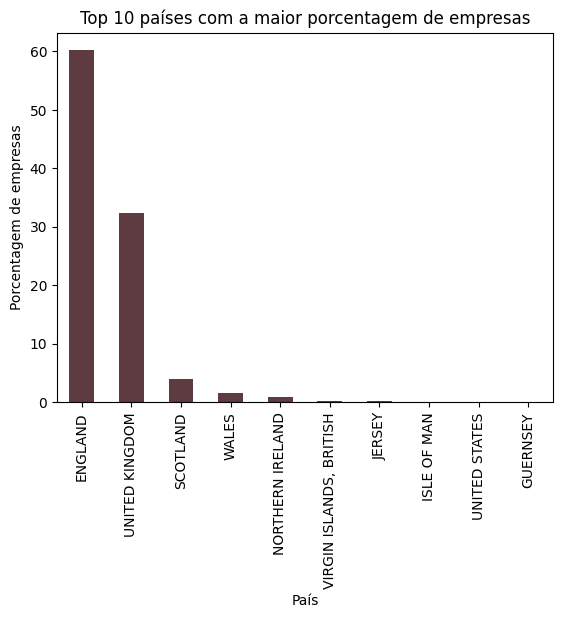

In [ ]:
# plot top_10_percentage in a bar chart
top_10_percentage.plot(kind='bar',color = '#5e3b40')
plt.title('Top 10 países com a maior porcentagem de empresas')
plt.xlabel('País')
plt.ylabel('Porcentagem de empresas')
plt.show()

Temos que praticamente mais de 95% da base de dados, são empresas registradas em UK. Sendo assim, é possível prosseguir com as análises apenas para estas empresas.

Vamos explorar um pouco mais para verificar mais informações.

### **4.2.2. Distribuição por categoria de empresa:**

Vamos perceber como está a distribuição das empresas de acordo com a categoria.

In [ ]:
# Group the number of companies by category
companies_by_category = df.groupby('Category_new')['CompanyNumber'].count().reset_index(name='Número de Empresas')
companies_by_category

,Category_new,Número de Empresas
0,Education and Culture,15158
1,Financial and Insurance Activities,6847
2,Food and Hospitality,16582
3,Health and Wellness,19068
4,Manufacturing and Industry,18878
5,Other Activities and Services,171051
6,Professional Services and Consulting,76881
7,Real Estate and Construction,90734
8,Retail,56849
9,Sports and Recreation,3214


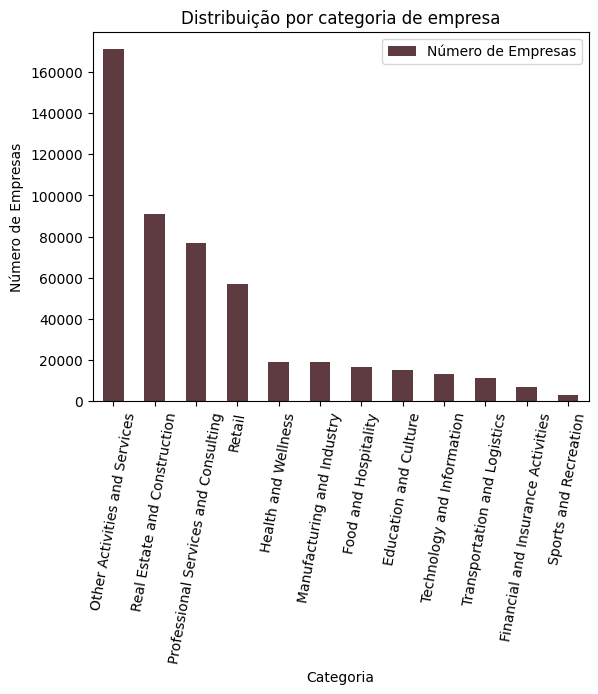

In [ ]:
#plot companies_by_category in a bar chart

companies_by_category = companies_by_category.sort_values(by='Número de Empresas', ascending=False)
companies_by_category.plot(kind='bar', x='Category_new', y='Número de Empresas', color = '#5e3b40')
plt.title('Distribuição por categoria de empresa')
plt.xlabel('Categoria')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=80)
plt.show()

**Setores Chave na Economia:**

"Real Estate and Construction" e "Retail" são categorias com números substanciais de empresas, indicando que são setores-chave na economia que empregam muitas pessoas e têm um impacto significativo no PIB.

OUtra observação importante é que a categoria "Health and Wellness", com 230853 empresas, reflete a importância crescente de serviços relacionados à saúde e ao bem-estar na economia moderna. Apesar de não estar entre as três primeiras categorias, é um nicho que possivelmente pode ser melhor explorado.

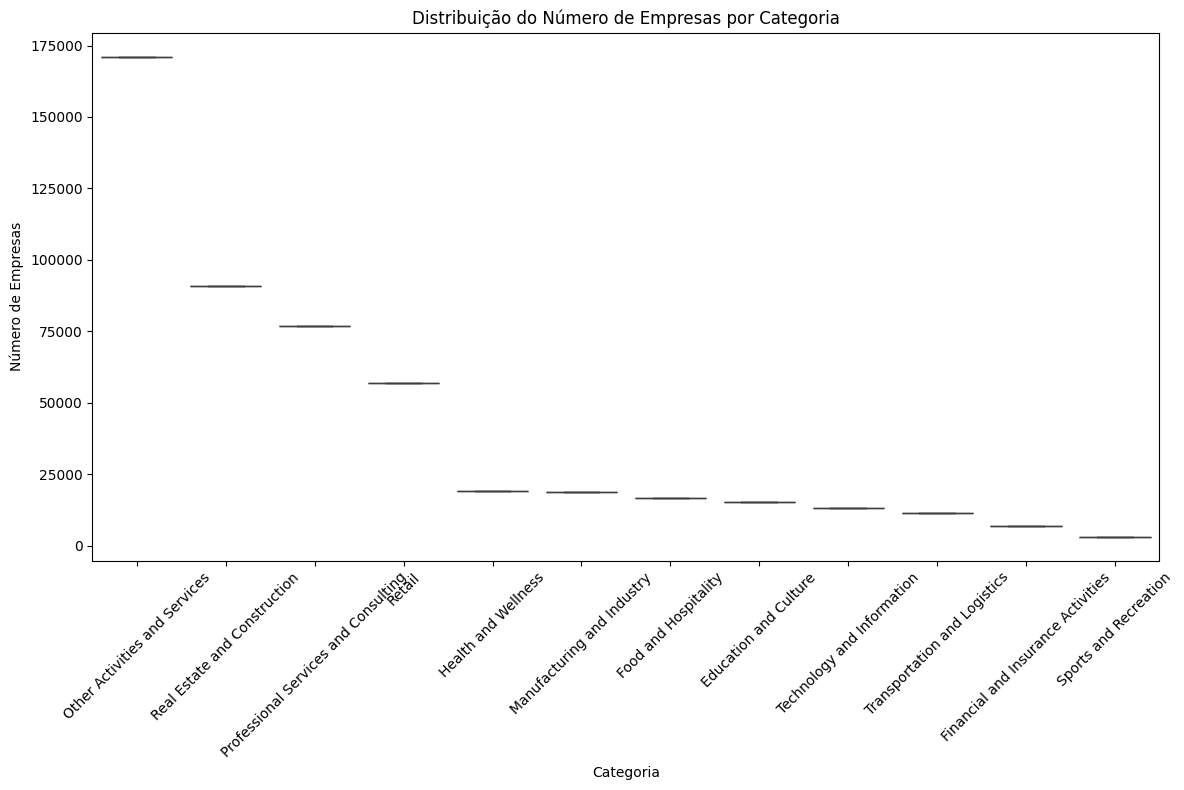

In [ ]:
# Group the number of companies by category
companies_by_category = df.groupby('Category_new')['CompanyNumber'].count().reset_index(name='Número de Empresas')

# Sort categories by number of companies
companies_by_category = companies_by_category.sort_values(by='Número de Empresas', ascending=False)

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category_new', y='Número de Empresas', data=companies_by_category)
plt.title('Distribuição do Número de Empresas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Neste caso o Box plot não nos auxilia muito a tirar conclusões.

### **4.2.3. Status das empresas:**

Vamos fazer o mesmo tipo de análise, porém, considerando os diferentes status na base de dados

In [ ]:
# group df_selected by status
status_counts = df.groupby('CompanyStatus')['CompanyNumber'].count().reset_index(name='Número de Empresas')
status_counts

,CompanyStatus,Número de Empresas
0,ADMINISTRATION ORDER,8
1,ADMINISTRATIVE RECEIVER,4
2,Active,460797
3,Active - Proposal to Strike off,29574
4,In Administration,304
5,In Administration/Administrative Receiver,24
6,In Administration/Receiver Manager,2
7,Liquidation,9101
8,Live but Receiver Manager on at least one charge,117
9,RECEIVER MANAGER / ADMINISTRATIVE RECEIVER,1


Para entender a distribuição dos dados e fazer uma análise mais detalhada, precisamos saber o que significam cada Status.

**Status Dicionário**

Os diferentes status das empresas fornecem informações importantes sobre sua situação jurídica e financeira. Aqui estão os principais status listados e seus significados comuns:

1. **Active**:
   - Indica que a empresa está operacional e em bom funcionamento.

2. **Active - Proposal to Strike off**:
   - Sugere que a empresa está ativa, mas há um processo em curso para retirá-la do registro. Isso pode ocorrer por solicitação da própria empresa ou por decisão das autoridades de registro.

3. **Liquidation**:
   - Indica que a empresa está em processo de liquidação, ou seja, suas operações estão sendo encerradas e seus ativos estão sendo vendidos para pagar credores.

4. **In Administration**:
   - Significa que a empresa está sob administração judicial. Um administrador é nomeado para gerenciar a empresa com o objetivo de recuperá-la financeiramente ou liquidar seus ativos de forma ordenada.

5. **Live but Receiver Manager on at least one charge**:
   - Refere-se a uma situação em que a empresa está operacional, mas um administrador judicial foi nomeado para gerenciar a empresa em relação a pelo menos uma carga registrada.

6. **Voluntary Arrangement**:
   - Indica que a empresa e seus credores concordaram com um plano voluntário de reorganização financeira.

7. **In Administration/Administrative Receiver**:
   - Combinando os dois status anteriores, indica que a empresa está tanto sob administração judicial quanto com um administrador judicial nomeado.

8. **RECEIVERSHIP**:
   - Refere-se a uma situação em que um receptor é nomeado para administrar os ativos da empresa para beneficiar os credores garantidos.

9. **ADMINISTRATION ORDER**:
   - Indica que um pedido de administração judicial foi concedido pelo tribunal para proteger a empresa contra a falência enquanto tenta se recuperar.

10. **ADMINISTRATIVE RECEIVER**:
    - Indica que um administrador judicial foi nomeado para proteger os interesses de um credor garantido.

11. **In Administration/Receiver Manager**:
    - Combinando a administração judicial com um gerente de receptor nomeado.

12. **RECEIVER MANAGER / ADMINISTRATIVE RECEIVER**:
    - Indica que tanto um gerente de receptor quanto um administrador judicial foram nomeados.

13. **VOLUNTARY ARRANGEMENT / RECEIVER MANAGER**:
    - Indica que um plano de reorganização voluntária foi combinado com a nomeação de um gerente de receptor.

14. **VOLUNTARY ARRANGEMENT / ADMINISTRATIVE RECEIVER**:
    - Indica que um plano de reorganização voluntária foi combinado com a nomeação de um administrador judicial.

Vamos seguir com as análises.

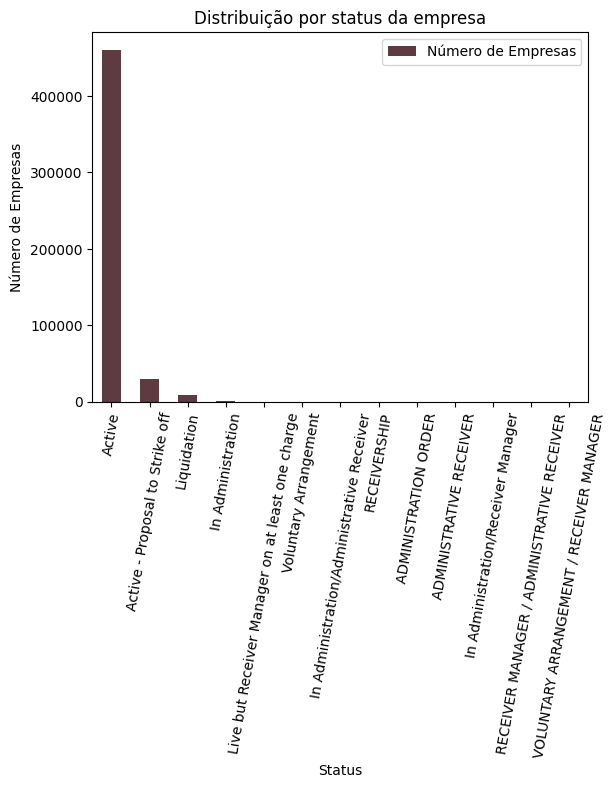

In [ ]:
status_counts = status_counts.sort_values(by='Número de Empresas', ascending=False)
status_counts.plot(kind='bar', x='CompanyStatus', y='Número de Empresas', color = '#5e3b40')
plt.title('Distribuição por status da empresa')
plt.xlabel('Status')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=80)
plt.show()

In [ ]:
status_counts

,CompanyStatus,Número de Empresas
2,Active,460797
3,Active - Proposal to Strike off,29574
7,Liquidation,9101
4,In Administration,304
8,Live but Receiver Manager on at least one charge,117
12,Voluntary Arrangement,53
5,In Administration/Administrative Receiver,24
10,RECEIVERSHIP,14
0,ADMINISTRATION ORDER,8
1,ADMINISTRATIVE RECEIVER,4


O status predominante entre as empresas é **Active**, com 460797 empresas, indicando que a maioria está operando normalmente. Existem 9101 empresas em **Liquidation**, refletindo um número significativo em processo de liquidação de ativos, e 304 empresas em **In Administration**, sinalizando dificuldades financeiras e esforços para evitar a falência.

Além disso, 29574 empresas estão listadas como **Active - Proposal to Strike off**, mostrando que, embora ativas, enfrentam processos para serem removidas do registro, possivelmente devido a considerações de encerramento ou falhas administrativas.

A prevalência de empresas **Active** sugere um ambiente empresarial estável, mas a análise de risco deve considerar outros fatores financeiros e operacionais.

Poderão ser feitas análises específicas para entender algumas implições para análise de risco, por exemplo, empresas em **Liquidation** e **In Administration** podem apresentar um risco elevado para credores e investidores, pois estão enfrentando problemas financeiros significativos, bem como **Empresas em Active - Proposal to Strike off** que podem indicar incerteza sobre sua continuidade operacional no futuro próximo.


### **4.2.4. Análise de risco**



Para analisar o risco das empresas em questão, vamos criar uma nova coluna para calcular a diferença de dias entre as datas da ultima declaração e da seguinte, para categorizar o tempo em que as empresas ainda estão em conformidade.

In [ ]:
# Determine the Minimum Date
min_date = df['ConfStmtNextDueDate'].min()

# Determine the maximum date
max_date = df['ConfStmtNextDueDate'].max()

# show results
print('Período de Data ConfStmtNextDueDate')
print(f"Data mínima: {min_date}")
print(f"Data máxima: {max_date}")

Período de Data ConfStmtNextDueDate
Data mínima: 2016-07-14 00:00:00
Data máxima: 2025-07-14 00:00:00


In [ ]:
# Determine the Minimum Date
min_date = df['ConfStmtLastMadeUpDate'].min()

# Determine the maximum date
max_date = df['ConfStmtLastMadeUpDate'].max()

# show results
print('Período de Data ConfStmtLastMadeUpDate')
print(f"Data mínima: {min_date}")
print(f"Data máxima: {max_date}")

Período de Data ConfStmtLastMadeUpDate
Data mínima: 2014-01-28 00:00:00
Data máxima: 2024-06-30 00:00:00


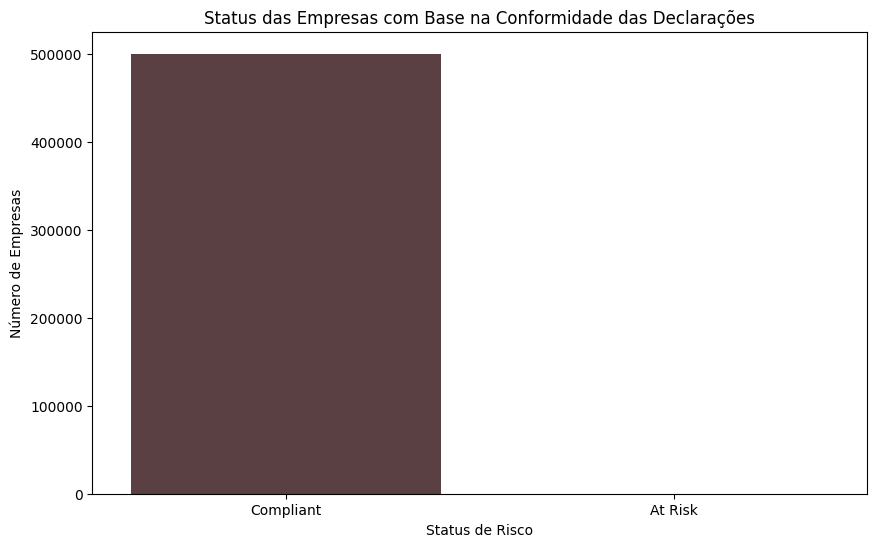

In [ ]:

# Calculate the difference between the dates
df['DaysToNextDue'] = (df['ConfStmtNextDueDate'] - df['ConfStmtLastMadeUpDate']).dt.days

# Sort companies based on the difference in days
def categorize_company(days):
    if days < 30:
        return 'At Risk'
    elif days < 90:
        return 'Needs Attention'
    else:
        return 'Compliant'

df['Status_Risk'] = df['DaysToNextDue'].apply(categorize_company)


# Bar chart with the count of companies in each status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Status_Risk', color = '#5e3b40')
plt.title('Status das Empresas com Base na Conformidade das Declarações')
plt.xlabel('Status de Risco')
plt.ylabel('Número de Empresas')
plt.show()


In [ ]:
df['Status_Risk'].value_counts()

Status_Risk
Compliant    499998
At Risk           2
Name: count, dtype: int64

Dos dados analisados, verificamos que a quase a totalidade das empresas (5.621.429) está em conformidade (`Compliant`), enquanto apenas 11 empresas estão classificadas como em risco (`At Risk`). Isso indica um ambiente empresarial predominantemente estável e saudável. As poucas empresas `At Risk` requerem atenção especial para evitar problemas futuros e garantir a continuidade operacional.

**Evolução de empresas em status Liquidation**

In [ ]:
#filter df with CompanyStatus= Liquidation
df_liquidation = df[df['CompanyStatus'] == 'Liquidation']
df_liquidation.head()

,CompanyName,CompanyNumber,RegAddress.AddressLine1,RegAddress.AddressLine2,RegAddress.PostTown,RegAddress.Country,RegAddress.PostCode,CompanyCategory,CompanyStatus,CountryOfOrigin,IncorporationDate,Accounts.AccountRefDay,Accounts.AccountRefMonth,Accounts.NextDueDate,Accounts.LastMadeUpDate,Accounts.AccountCategory,Returns.NextDueDate,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,LimitedPartnerships.NumGenPartners,LimitedPartnerships.NumLimPartners,URI,ConfStmtNextDueDate,ConfStmtLastMadeUpDate,Category_new,DaysToNextDue,Status_Risk
10,NSPIRED LTD,SC421617,26 POLMUIR ROAD,NaN,ABERDEEN,UNITED KINGDOM,AB11 7SY,Private Limited Company,Liquidation,United Kingdom,2012-04-11,10.0,1.0,2023-10-10,2022-01-10,NaT,2017-05-09,0,0,0,0,70229 - Management consultancy activities othe...,0,0,http://business.data.gov.uk/id/company/SC421617,2022-04-25,2021-04-11,Professional Services and Consulting,379.0,Compliant
27,"""A.B.J.Z DRIVER HIRE "" LTD",09151627,C/O HUDSON WEIR LIMITED,58 LEMAN STREET,LONDON,NaN,E1 8EU,Private Limited Company,Liquidation,United Kingdom,2014-07-29,31.0,7.0,2024-04-30,2022-07-31,NaT,2016-08-25,0,0,0,0,49410 - Freight transport by road,0,0,http://business.data.gov.uk/id/company/09151627,2025-02-09,2024-01-26,Transportation and Logistics,380.0,Compliant
41,"""BACHELORS"" LIMITED(THE)",00807672,47A HIGH STREET,BANSTEAD,SURREY,NaN,SM7 2NL,Private Limited Company,Liquidation,United Kingdom,1964-06-03,30.0,6.0,2003-04-30,NaT,NaT,NaT,1,1,0,0,None Supplied,0,0,http://business.data.gov.uk/id/company/00807672,2017-06-17,NaT,Other Activities and Services,NaN,Compliant
75,"""EVEERGE"" LIMITED",00612503,00612503 - COMPANIES HOUSE DEFAULT ADDRESS,NaN,CARDIFF,NaN,CF14 8LH,Private Limited Company,Liquidation,United Kingdom,1958-10-07,31.0,12.0,1995-10-31,1993-12-31,NaT,1994-08-06,2,2,0,0,2875 - Manufacture other fabricated metal prod...,0,0,http://business.data.gov.uk/id/company/00612503,NaT,NaT,Manufacturing and Industry,NaN,Compliant
96,"""J.D.""INSULATING COMPANY LIMITED",00275795,57 CHISWELL ST.,LONDON E.C.1.,NaN,NaN,NaN,Private Limited Company,Liquidation,United Kingdom,1933-05-11,31.0,3.0,2001-01-31,NaT,NaT,NaT,3,3,0,0,None Supplied,0,0,http://business.data.gov.uk/id/company/00275795,2017-05-13,NaT,Other Activities and Services,NaN,Compliant


C:\Users\vanes\AppData\Local\Temp\ipykernel_4000\2329126275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liquidation['Year']= df['ConfStmtLastMadeUpDate'].dt.year


<Axes: xlabel='Year'>

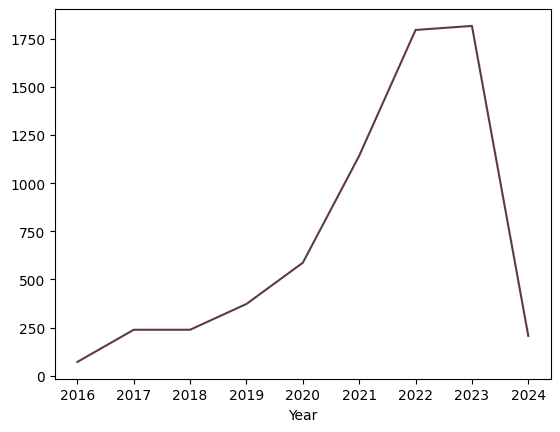

In [ ]:
#plot line overtime
df_liquidation['Year']= df['ConfStmtLastMadeUpDate'].dt.year
df_liquidation.groupby('Year')['CompanyNumber'].count().plot(kind='line', color = '#5e3b40')

Vemos um crescente numero de empresas em processo de liquidação, principalmente após os anos 2020, com declínio a partir de 2023. Isto sugere que no período de 2020 (COVID) houve maior índice de empresas com problemas financeiros e de dissolução. Isto será verificado mais a frente.

### **4.3.5: Volume de Incorporações ao Longo do Tempo:**

Vamos agora analisar a quantidade de empresas incorporadas por ano/mês. Isso nos ajudará a identificar se há um crescimento, declínio ou flutuação na criação de empresas ao longo do tempo.

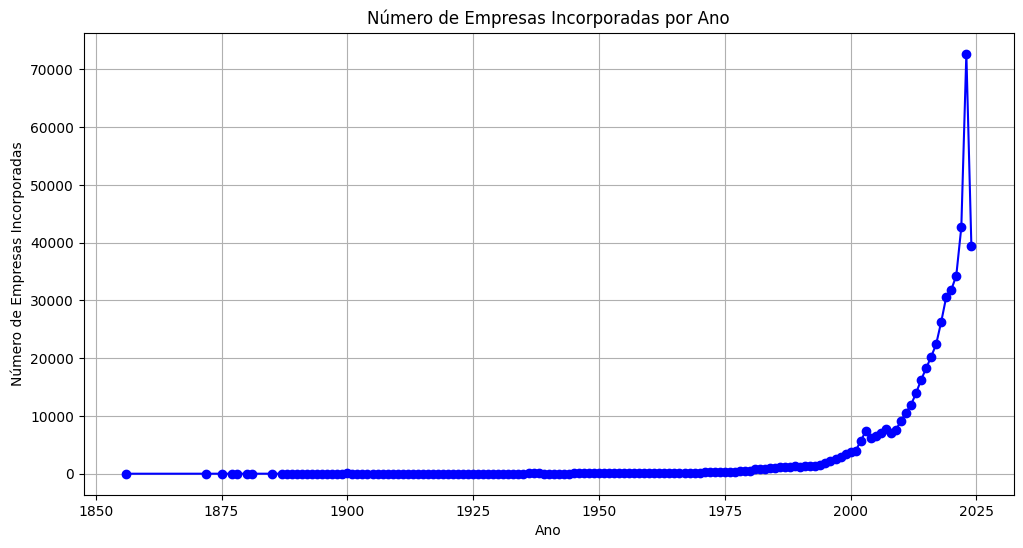

In [ ]:
df['Year_Incorporation'] = df['IncorporationDate'].dt.year

# Count the number of incorporations per year
incorporations_by_year = df['Year_Incorporation'].value_counts().sort_index()

# Plot line graph to visualize the number of incorporations over the years
plt.figure(figsize=(12, 6))
plt.plot(incorporations_by_year.index, incorporations_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Número de Empresas Incorporadas por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Empresas Incorporadas')
plt.grid(True)
plt.show()

Podemos observar que o número de incorporações aumentou significativamente nos anos mais recentes, especialmente a partir de 2016. Isso pode indicar um aumento na atividade empreendedora ou mudanças nas políticas econômicas que promovem a criação de novas empresas.

Existem alguns anos específicos com picos notáveis no número de incorporações, como 2024, 2021, 2020 e 2019. Isso pode estar relacionado a fatores econômicos, mudanças regulatórias ou eventos específicos que incentivaram a criação de empresas, tais como o COVID.

Vamos analisar como o covid impactou os números gerais de incorporações de emepresas.

### **4.3.6. Efeito do COVID na Incorporação das empresas:**



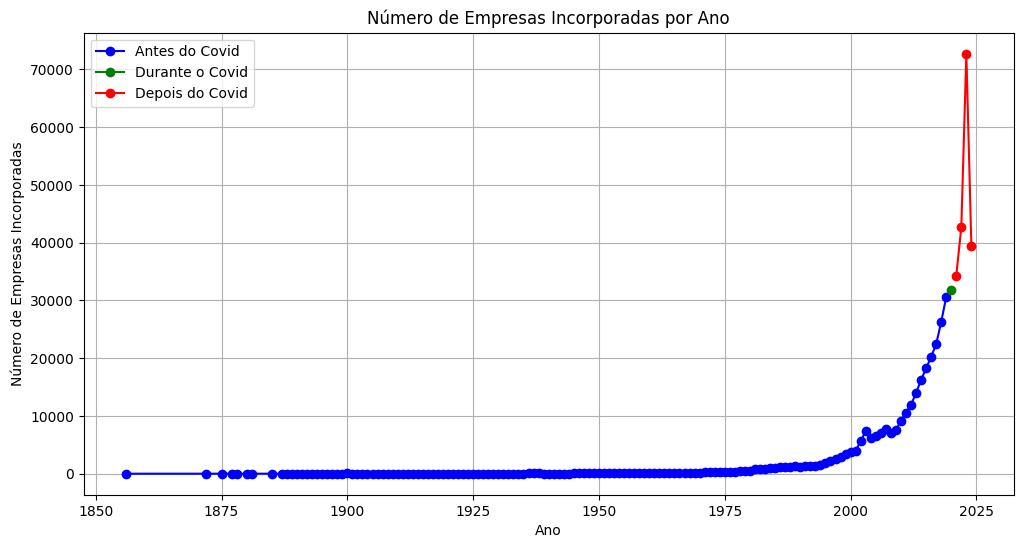

In [ ]:

# Defining the periods of interest
pre_covid_period = (df['Year_Incorporation'] < 2020)
during_covid_period = (df['Year_Incorporation'] == 2020)
post_covid_period = (df['Year_Incorporation'] > 2020)

# Counting the number of incorporations per year for each period
incorporations_pre_covid = df.loc[pre_covid_period, 'Year_Incorporation'].value_counts().sort_index()
incorporations_during_covid = df.loc[during_covid_period, 'Year_Incorporation'].value_counts().sort_index()
incorporations_post_covid = df.loc[post_covid_period, 'Year_Incorporation'].value_counts().sort_index()

# Plotting a line graph to visualize the number of incorporations over the years for each period
plt.figure(figsize=(12, 6))
plt.plot(incorporations_pre_covid.index, incorporations_pre_covid.values, marker='o', linestyle='-', color='b', label='Antes do Covid')
plt.plot(incorporations_during_covid.index, incorporations_during_covid.values, marker='o', linestyle='-', color='g', label='Durante o Covid')
plt.plot(incorporations_post_covid.index, incorporations_post_covid.values, marker='o', linestyle='-', color='r', label='Depois do Covid')
plt.title('Número de Empresas Incorporadas por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Empresas Incorporadas')
plt.legend()
plt.grid(True)
plt.show()


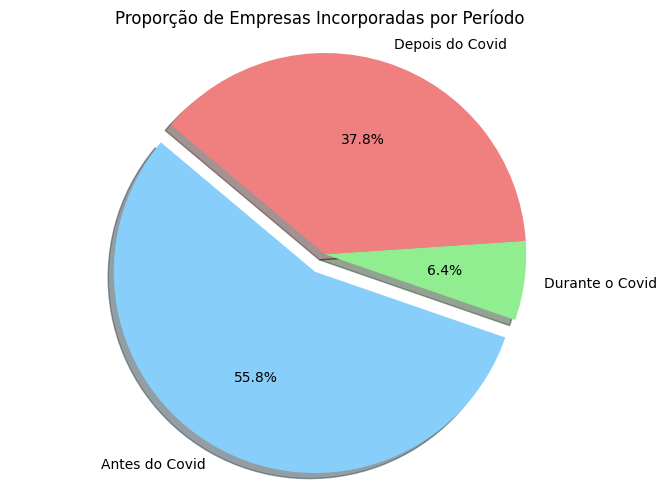

Total de incorporações antes do Covid: 279059
Total de incorporações durante o Covid: 31816
Total de incorporações depois do Covid: 189125


In [ ]:

#Defining the periods of interest
pre_covid_period = (df['Year_Incorporation'] < 2020)
during_covid_period = (df['Year_Incorporation'] == 2020)
post_covid_period = (df['Year_Incorporation'] > 2020)

#Counting the total number of incorporations for each period
total_incorporations_pre_covid = df.loc[pre_covid_period, 'Year_Incorporation'].count()
total_incorporations_during_covid = df.loc[during_covid_period, 'Year_Incorporation'].count()
total_incorporations_post_covid = df.loc[post_covid_period, 'Year_Incorporation'].count()

# Preparing data for the pie chart
periods = ['Antes do Covid', 'Durante o Covid', 'Depois do Covid']
totals = [total_incorporations_pre_covid, total_incorporations_during_covid, total_incorporations_post_covid]
colors = ['lightskyblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # Destacando a primeira fatia (Antes do Covid)

# Plotting Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(totals, explode=explode, labels=periods, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proporção de Empresas Incorporadas por Período')
plt.axis('equal')  # Garante que o gráfico de pizza seja desenhado como um círculo
plt.show()

# show results
print(f"Total de incorporações antes do Covid: {total_incorporations_pre_covid}")
print(f"Total de incorporações durante o Covid: {total_incorporations_during_covid}")
print(f"Total de incorporações depois do Covid: {total_incorporations_post_covid}")



Os dados mostram uma redução significativa nas incorporações durante o período de Covid-19, com um total de 368,612 novas empresas registradas, em comparação com 3,050,498 antes e 2,202,305 depois da pandemia. Isso indica um impacto significativo inicial da crise na criação de negócios.

No entanto, a recuperação subsequente sugere uma adaptação econômica e possivelmente políticas de incentivo que impulsionaram a formação de novas empresas, superando os níveis pré-pandêmicos.

## 5. Machine Learning Models

Possíveis modelos de Machine Learning que podem ser construídos:

**1. Prever a Conformidade:**

- Objetivo: Prever se uma empresa estará em conformidade no próximo período de apresentação de declarações.

- Entrada: Dados de datas, status atual da empresa, categoria, etc.
- Saída: Classificação binária (em conformidade / não em conformidade).

**2. Estimativa de Atrasos:**

- Objetivo: Estimar a probabilidade de uma empresa atrasar a apresentação de suas declarações futuras.
- Entrada: Histórico de datas de apresentação, status da empresa, etc.
- Saída: Probabilidade de atraso.

**3. Análise de Risco:**

- Objetivo: Avaliar o risco de uma empresa cair em status de conformidade irregular ou enfrentar problemas financeiros.
- Entrada: Datas de conformidade, status da empresa, categoria, entre outros fatores financeiros.
- Saída: Classificação de risco (baixo, médio, alto).

**4. Previsão do Número de Empresas Incorporadas:**
- Objetivo: Prever o número de novas empresas que serão incorporadas em um período futuro com base em dados históricos.
- Entrada: Datas de Conformidade, Status da Empresa, Categoria da Empresa.
- Previsão do Número de Empresas em Conformidade: Número estimado de empresas que cumprirão com os requisitos de apresentação de declarações confirmatórias.

**5. Previsão do Status da Empresa:**
- Objetivo: Prever se uma empresa estará ativa ou será dissolvida no futuro.



Vamos seguir com um modelo para prever se uma empresa estará ativa ou estará em Liquidation no futuro, para isto vamos verificar alguns modelos de classificação.

In [ ]:
# Selecionar apenas as colunas relevantes
relevant_columns = [
    'CompanyStatus',
    'IncorporationDate',
    'Accounts.AccountRefDay', 'Accounts.AccountRefMonth',
    'Accounts.NextDueDate', 'Accounts.LastMadeUpDate',
    'Mortgages.NumMortCharges', 'Mortgages.NumMortOutstanding',
    'Mortgages.NumMortPartSatisfied', 'Mortgages.NumMortSatisfied',
    'SICCode.SicText_1',
    'Category_new',
    'Status_Risk'
]



# Definir tamanho da amostra
sample_size = 100000  # ajuste conforme necessário

# Criar um novo DataFrame apenas com as colunas relevantes e uma amostra aleatória
df_for_model = df[relevant_columns].sample(n=sample_size, random_state=42).copy()



In [ ]:
# Verificar as primeiras linhas do novo DataFrame
df_for_model.head()


,CompanyStatus,IncorporationDate,Accounts.AccountRefDay,Accounts.AccountRefMonth,Accounts.NextDueDate,Accounts.LastMadeUpDate,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied,SICCode.SicText_1,Category_new,Status_Risk
104241,Active,2015-03-05,31.0,3.0,2024-12-31,2023-03-31,0,0,0,0,70229 - Management consultancy activities othe...,Professional Services and Consulting,Compliant
199676,Active,2022-02-24,28.0,2.0,2024-11-30,2023-02-28,0,0,0,0,55209 - Other holiday and other collective acc...,Other Activities and Services,Compliant
140199,Active,2010-11-02,30.0,11.0,2024-08-31,2022-11-30,0,0,0,0,45112 - Sale of used cars and light motor vehi...,Retail,Compliant
132814,Active,2022-10-31,31.0,10.0,2024-07-31,NaT,0,0,0,0,"84120 - Regulation of health care, education, ...",Health and Wellness,Compliant
408697,Active,1973-07-02,30.0,4.0,2025-01-31,2023-04-30,0,0,0,0,98000 - Residents property management,Professional Services and Consulting,Compliant


In [ ]:
# main statistics
df_for_model.describe()

,IncorporationDate,Accounts.AccountRefDay,Accounts.AccountRefMonth,Accounts.NextDueDate,Accounts.LastMadeUpDate,Mortgages.NumMortCharges,Mortgages.NumMortOutstanding,Mortgages.NumMortPartSatisfied,Mortgages.NumMortSatisfied
count,100000,97390.000000,97390.000000,97122,73074,100000.000000,100000.000000,100000.000000,100000.000000
mean,2015-06-09 08:20:09.312000,30.161043,6.288171,2024-12-07 20:56:54.295422464,2023-02-02 13:39:39.210115840,0.636870,0.364310,0.000210,0.272030
min,1878-02-20 00:00:00,1.000000,1.000000,1901-11-01 00:00:00,1981-06-30 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2012-06-01 00:00:00,30.000000,3.000000,2024-10-31 00:00:00,2022-12-31 00:00:00,0.000000,0.000000,0.000000,0.000000
50%,2019-01-10 00:00:00,31.000000,6.000000,2025-01-31 00:00:00,2023-03-31 00:00:00,0.000000,0.000000,0.000000,0.000000
75%,2022-09-23 06:00:00,31.000000,9.000000,2025-06-30 00:00:00,2023-07-31 00:00:00,0.000000,0.000000,0.000000,0.000000
max,2024-06-30 00:00:00,31.000000,12.000000,2026-03-31 00:00:00,2024-06-30 00:00:00,6121.000000,6121.000000,3.000000,5720.000000
std,NaN,2.828504,3.541043,NaN,NaN,30.292493,24.120689,0.017028,18.267041


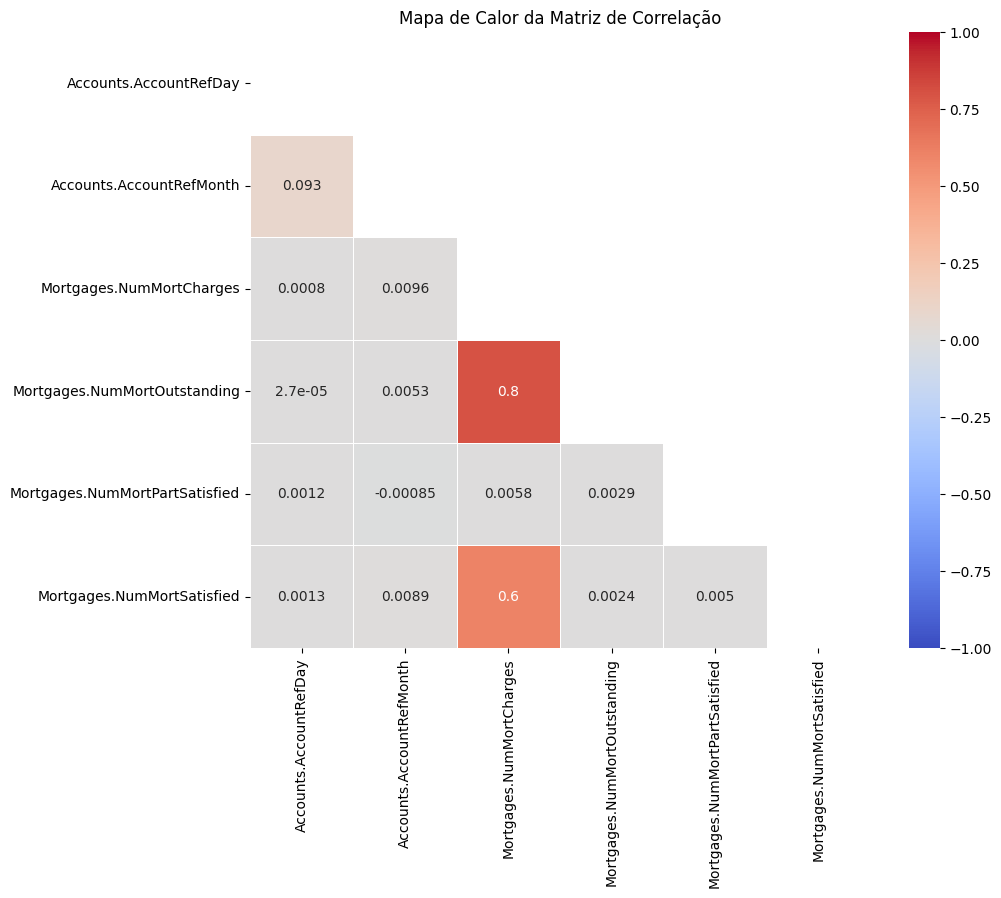

In [66]:
# Select numerical columns
numeric_columns = df_for_model.select_dtypes(include=[np.number]).columns
df_numeric = df_for_model[numeric_columns]

# Calculate Person correlation matrix
corr_matrix = df_numeric.corr()

# generate a mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# setup the figure size
plt.figure(figsize=(10, 8))

# heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)

# show
plt.title("Mapa de Calor da Matriz de Correlação")
plt.show()

Temos algumas colunas com autocorrelação. Isto pode causar multicolinearidade e atrapalhar o desempenho do modelo. Portanto vamos desconsiderar a coluna `Mortgages.NumMortCharges`.	

In [67]:
# drop the Mortgages.NumMortCharges column
df_for_model = df_for_model.drop(columns=['Mortgages.NumMortCharges'])

In [68]:

# Handle missing values
df_for_model['Accounts.NextDueDate'].fillna(pd.Timestamp('now'), inplace=True)
df_for_model['Accounts.LastMadeUpDate'].fillna(pd.Timestamp('now'), inplace=True)

# Convert dates to datetime format
date_columns = ['IncorporationDate', 'Accounts.NextDueDate', 'Accounts.LastMadeUpDate']
for col in date_columns:
    df_for_model[col] = pd.to_datetime(df_for_model[col], errors='coerce')

# Extract useful characteristics from dates (e.g. number of days since a reference date)
reference_date = pd.Timestamp('now')
df_for_model['DaysSinceIncorporation'] = (reference_date - df_for_model['IncorporationDate']).dt.days
df_for_model['DaysUntilNextDue'] = (df_for_model['Accounts.NextDueDate'] - reference_date).dt.days
df_for_model['DaysSinceLastMadeUp'] = (reference_date - df_for_model['Accounts.LastMadeUpDate']).dt.days

# Remove the original date columns
df_for_model.drop(date_columns, axis=1, inplace=True)

# Populate categorical columns with most frequent values
categorical_columns = ['SICCode.SicText_1', 'Category_new', 'Status_Risk']
for col in categorical_columns:
    df_for_model[col].fillna(df_for_model[col].mode()[0], inplace=True)

# Encode categorical variables
df_for_model = pd.get_dummies(df_for_model, columns=categorical_columns, drop_first=True)



C:\Users\vanes\AppData\Local\Temp\ipykernel_4000\2451098815.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_for_model['Accounts.NextDueDate'].fillna(pd.Timestamp('now'), inplace=True)
C:\Users\vanes\AppData\Local\Temp\ipykernel_4000\2451098815.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [69]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df_for_model .drop('CompanyStatus', axis=1)  # Features
y = df_for_model['CompanyStatus']  # Target

# Fill missing values ​​with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on Test Set
y_pred = rf_classifier.predict(X_test)


In [70]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

cfm = confusion_matrix(y_test, y_pred)

tn = cfm[0][0]
fp = cfm[0][1]
fn = cfm[1][0]
tp = cfm[1][1]

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

sensibilidade = tp / (tp + fn) #sensibilidade = sensitivity = recall = acertos da classe 1
especificidade = tn / (tn + fp) #especificidade = specificity = acertos da classe 0

print('Confusion Matrix: \n', cfm, '\n')

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensibilidade, '\n')
print('Especificidade: \n', especificidade, '\n')

Confusion Matrix: 
 [[    0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     1     0     0]
 [    0     0 18037   306     0    53     0     0]
 [    0     0   514   661     0    61     0     0]
 [    0     0     4     5     0     9     0     0]
 [    1     0    72   115     0   157     0     0]
 [    0     0     0     1     0     0     0     0]
 [    0     0     1     0     0     1     0     0]] 

True Negative: 0
False Positive: 0
False Negative: 0
True Positive: 0
Balanced accuracy: 
 0.24629337447502442 

Accuracy: 
 0.94275 

Sensitivity: 
 nan 

Especificidade: 
 nan 



C:\Users\vanes\AppData\Local\Temp\ipykernel_4000\3484828458.py:14: RuntimeWarning: invalid value encountered in scalar divide
  sensibilidade = tp / (tp + fn) #sensibilidade = sensitivity = recall = acertos da classe 1
C:\Users\vanes\AppData\Local\Temp\ipykernel_4000\3484828458.py:15: RuntimeWarning: invalid value encountered in scalar divide
  especificidade = tn / (tn + fp) #especificidade = specificity = acertos da classe 0


In [71]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average=None)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')

print(f"F1-Score por classe: {f1}")
print(f"F1-Score Médio Ponderado: {f1_weighted}")
print(f"F1-Score Médio Macro: {f1_macro}")
print(f"F1-Score Médio Micro: {f1_micro}")


F1-Score por classe: [0.         0.         0.97434097 0.56884682 0.         0.5
 0.         0.        ]
F1-Score Médio Ponderado: 0.9399785556040684
F1-Score Médio Macro: 0.25539847298193885
F1-Score Médio Micro: 0.94275


In [72]:

# Criar um DataFrame com os dados reais e as previsões
df_results = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})

df_results.head(100)

,Real,Previsto
32134,Active,Active
469167,Active,Active
59371,Active,Active
427358,Active,Active
183371,Active,Active
187739,Active,Active
422186,Active,Active
173228,Active,Active
373445,Active,Active
247585,Active,Active


**Problemas observados no modelo:**

- Algumas classes parecem ter muito poucos exemplos. Por exemplo, na matriz de confusão, temos classe representada pela linha 0 que tem apenas 1 amostra na coluna 5.
Classes com muito poucos exemplos podem resultar em métricas não calculáveis, como Sensibilidade (Sensibilidade é calculada com base nos verdadeiros positivos e falsos negativos de uma classe, e se ambos forem zero, a divisão resultará em nan).

Provavelmente se a sample for retirada dos dados totais (csv completo) o modelo pode ter uma performance melhor.

**Adoção do F1-Score para avaliar o modelo:**

Interpretação dos Resultados:

- **F1-Score por Classe:**
O F1-Score é uma medida que combina precisão e recall (sensibilidade) em uma única métrica, sendo útil especialmente em casos de classes desbalanceadas.

Os valores do F1-Score por classe obtidos são os seguintes:


    - Classe 0 e Classe 1: F1-Score de 0 (indicando que o modelo não conseguiu prever corretamente essas classes).
    - Classe 2: F1-Score de 0.974, indicando um bom desempenho para essa classe.
    - Classe 3: F1-Score de 0.569, indicando um desempenho moderado para essa classe.
    - Classe 4 a 7: F1-Score de 0 (novamente, o modelo não conseguiu prever corretamente essas classes).

- **F1-Score Médio POnderado:** 0.9399785556040684

Este valor representa a média ponderada dos F1-Scores de cada classe, levando em consideração o número de amostras em cada classe. Isso mostra um desempenho geral do modelo considerando o desbalanceamento das classes.

- **F1-Score Médio Macro:** 0.25539847298193885

O F1-Score Médio Macro é a média aritmética dos F1-Scores de todas as classes, sem levar em conta o desbalanceamento das classes. É mais baixo aqui porque várias classes têm F1-Scores muito baixos (0 ou próximo de 0).

- **F1-Score Médio Micro:** 0.94275

O F1-Score Médio Micro é calculado considerando todas as predições e todas as classes em conjunto. É semelhante à acurácia geral do modelo.

**Interpretação:**

Temos algumas classes com F1-Score de 0, isso sugere que o modelo teve dificuldade em prever corretamente essas classes específicas. Pode ser devido a várias razões, como desbalanceamento de dados ou falta de representação da classe nos dados de treinamento.


Considerações Finais:
É importante analisar os F1-Scores por classe para entender onde o modelo está acertando e onde está tendo dificuldades.
O F1-Score Médio Ponderado é uma métrica útil para avaliar o desempenho geral do modelo, especialmente em casos de desbalanceamento de classes.

Como indicação de próximos passos, podemos criar um outro modelo porém com a sample sendo tirada do dataframe com todos os dados contidos no csv.

-----